In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from mlxtend.plotting import plot_decision_regions


# Load the dataset
iris = pd.read_csv('Iris.csv')
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:


# Data preprocessing
# Drop the Id column as it's not needed
iris = iris.drop('Id', axis=1)


In [18]:


# Explore the dataset
print(iris.info())
print(iris['Species'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


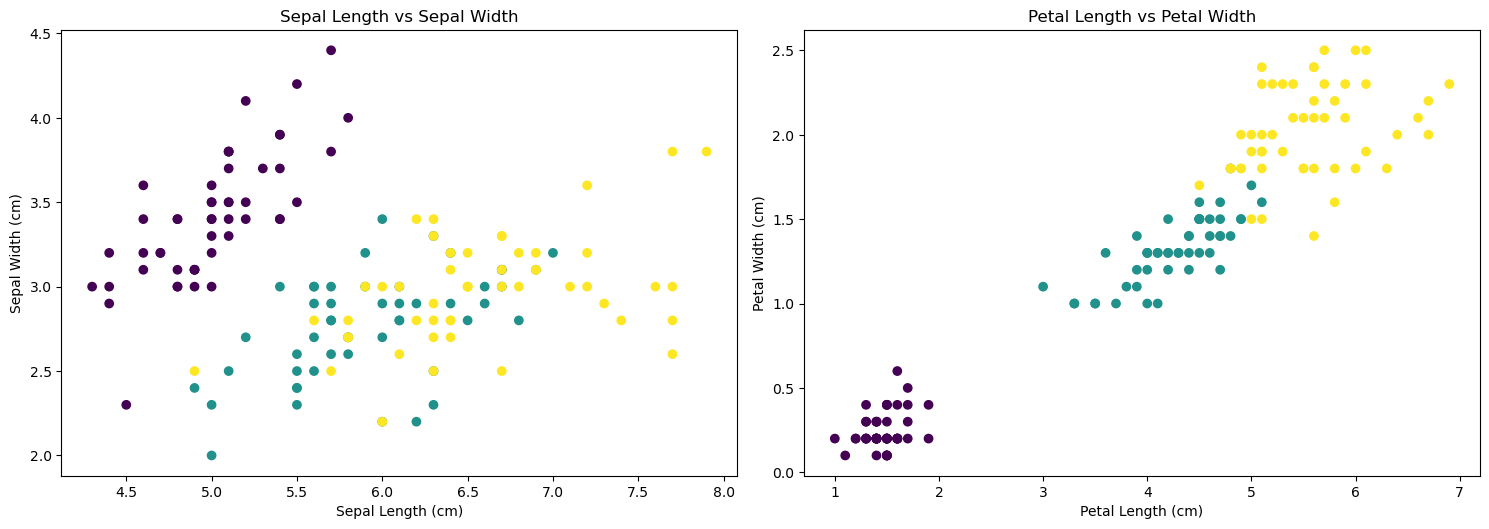

In [19]:


# Visualize the data
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'], c=iris['Species'].astype('category').cat.codes)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')

plt.subplot(2, 2, 2)
plt.scatter(iris['PetalLengthCm'], iris['PetalWidthCm'], c=iris['Species'].astype('category').cat.codes)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')

plt.tight_layout()
plt.show()


In [30]:
# Convert species names to numerical labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
iris['Species_encoded'] = label_encoder.fit_transform(iris['Species'])


In [31]:

# Prepare data for modeling
X = iris.iloc[:, :-2].values  # All features except species and encoded species
y = iris.iloc[:, -1].values    # Encoded species labels


In [32]:

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [33]:

# Find optimal K value
error_rates = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rates.append(np.mean(pred_i != y_test))


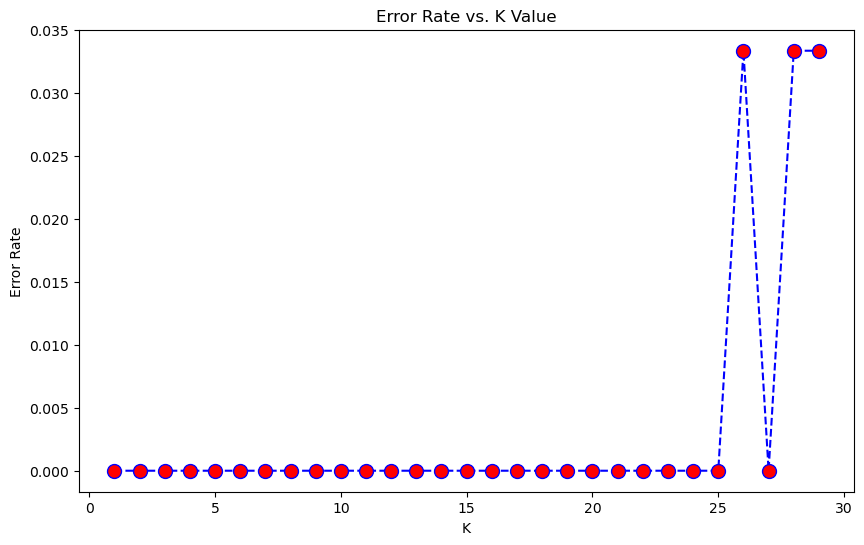

In [34]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), error_rates, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [35]:

# Train with optimal K (we'll use k=3 based on the plot)
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [36]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))



Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Accuracy Score: 1.0


In [ ]:

# Decision boundary visualization using first two features
X_2d = iris.iloc[:, [0, 1]].values  # Sepal Length and Width
y_2d = iris['Species_encoded'].values

# Split and scale the 2D data
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y_2d, test_size=0.2, random_state=42)
scaler_2d = StandardScaler()
X_train_2d = scaler_2d.fit_transform(X_train_2d)
X_test_2d = scaler_2d.transform(X_test_2d)

# Train KNN on 2D data
knn_2d = KNeighborsClassifier(n_neighbors=k)
knn_2d.fit(X_train_2d, y_train_2d)

# Create meshgrid
h = 0.02  # step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for each point in meshgrid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
graph = plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_2d, s=20, edgecolor='k')
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title(f'KNN (K={k}) Decision Boundaries')

# Create legend with actual class names
handles, _ = scatter.legend_elements()
plt.legend(handles, label_encoder.classes_)

plt.show()